# Team members and dataset

Dataset: earthquakes \
Jego, Thomas (team leader)

In [45]:
#Import libraries

import pandas as pd
import numpy as np
import dash
import matplotlib.pyplot as plt

In [51]:
# Function for reading a CSV file
# Input: the path to the csv file
# Output: a pandas DataFrame
def load_data(file_path):
    df = pd.read_csv(file_path)
    return df


df = load_data('earthquakes.csv')
df = df[['Year','Damage ($Mil)', "Location Name"]]
# delete rows with NaN values in 'Damage ($Mil)' column
df = df.dropna(subset=['Damage ($Mil)'])
# sort by year
df = df.sort_values(by='Damage ($Mil)', ascending=False)
df.head()

,Year,Damage ($Mil),Location Name
3079,1995.0,100000.0,"JAPAN: SW HONSHU: KOBE, AWAJI-SHIMA, NISHINO..."
3717,2008.0,86000.0,CHINA: SICHUAN PROVINCE
3049,1994.0,40000.0,CALIFORNIA: NORTHRIDGE
3840,2010.0,30000.0,"CHILE: MAULE, CONCEPCION, TALCAHUANO"
3476,2004.0,28000.0,JAPAN: HONSHU: NIIGATA PREFECTURE


- Curseur date sur la heatmap (sur dash)
- Carte des plaques tectoniques
- PIB/Hab correlé avec les Damages ($Mil) -> Tableau?
- Système de rank, proba qu'un séisme arrive (ranking crée avec plein de param. (fréquences, magnitude, etc.))
- Dans le dashboard, faire une fiche caractéristique d'un pays, on selectionne et on a les infos (fréquence, morts, etc..)
- Avoir le cout relatif et le cout absolu (pour avoir la même echelle du $)
- Valeur relative de l'argent entre 2000 à ajd (en fonction des pays)

----------------------

## Data Exploration
Let's now explore the dataset by showing some caracteristics and informations

In [18]:
df = pd.read_csv('earthquakes.csv') # Load the dataset
df.head() # Display the first few rows of the dataset

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Location Name,Latitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
0,-2150.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,"JORDAN: BAB-A-DARAA,AL-KARAK",31.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-2000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,TURKMENISTAN: W,38.0,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,-1250.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,ISRAEL: ARIHA (JERICHO),32.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,-1050.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,JORDAN: SW: TIMNA COPPER MINES,29.6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,-479.0,NaN,NaN,NaN,NaN,NaN,9.0,NaN,GREECE: MACEDONIA,39.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


We can see that we have a lot of missing values, we need to do a cleaning process later

--------------

In [ ]:
df.describe() # Get summary statistics of the dataset

,Year,Mo,Dy,Hr,Mn,Sec,Tsu,Vol,Latitude,Longitude,...,Total Missing,Total Missing Description,Total Injuries,Total Injuries Description,Total Damage ($Mil),Total Damage Description,Total Houses Destroyed,Total Houses Destroyed Description,Total Houses Damaged,Total Houses Damaged Description
count,4424.000000,4330.000000,4280.000000,3665.000000,3581.000000,3437.000000,1390.000000,36.000000,4424.000000,4424.000000,...,25.00000,26.000000,1253.000000,1432.000000,456.000000,2876.000000,7.760000e+02,1549.000000,4.260000e+02,787.000000
mean,1887.339286,6.525635,15.772430,11.310232,28.940799,24.423916,2294.876259,3769.250000,20.611729,46.949802,...,1910.68000,1.807692,2390.756584,1.942737,1892.405592,2.167942,1.899685e+04,2.684312,5.913080e+04,2.473952
std,283.896376,3.443356,8.773091,7.053683,17.272006,19.187007,1599.876217,2202.337529,23.830736,90.578248,...,8667.79685,1.059027,27489.599557,1.078765,12469.563604,1.051688,2.001101e+05,1.074916,1.017700e+06,1.135936
min,-2150.000000,1.000000,1.000000,0.000000,0.000000,0.000000,9.000000,43.000000,-62.877000,-179.984000,...,1.00000,1.000000,1.000000,1.000000,0.010000,1.000000,1.000000e+00,1.000000,1.000000e+00,1.000000
25%,1906.000000,4.000000,8.000000,5.000000,14.000000,5.900000,1277.500000,2205.000000,3.415750,1.500000,...,5.00000,1.000000,10.000000,1.000000,4.875000,1.000000,6.000000e+01,2.000000,9.000000e+01,1.000000
50%,1967.000000,7.000000,16.000000,11.000000,29.000000,23.300000,1965.500000,4102.500000,29.581500,69.267500,...,21.00000,1.000000,40.000000,1.000000,30.000000,2.000000,5.000000e+02,3.000000,6.735000e+02,3.000000
75%,2002.000000,9.000000,23.000000,18.000000,44.000000,41.000000,3029.500000,5124.000000,38.320750,121.373000,...,138.00000,3.000000,200.000000,3.000000,292.500000,3.000000,3.618250e+03,4.000000,3.000000e+03,3.000000
max,2020.000000,12.000000,31.000000,23.000000,59.000000,59.900000,5760.000000,7444.000000,73.122000,180.000000,...,43476.00000,4.000000,799000.000000,4.000000,220085.456000,4.000000,5.360000e+06,4.000000,2.100000e+07,4.000000


Some value are interesting to note, as the mean damage cost of ~1900M$ = 1.9Mds$ per example\
The oldest earthquake from -2150BC or the most recent in the dataset which is in year 2020\
Really interesting data that we will display later

------------

In [17]:
df.info() # Get information about the dataset columns and data types

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 38 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Year                                4424 non-null   float64
 1   Mo                                  4330 non-null   float64
 2   Dy                                  4280 non-null   float64
 3   Hr                                  3665 non-null   float64
 4   Mn                                  3581 non-null   float64
 5   Sec                                 3437 non-null   float64
 6   Tsu                                 1390 non-null   float64
 7   Vol                                 36 non-null     float64
 8   Location Name                       4423 non-null   object 
 9   Latitude                            4424 non-null   float64
 10  Longitude                           4424 non-null   float64
 11  Focal Depth (km)                    3171 no

Here we have every features with the type, most of them are numerical data which is good for us. The only text data is the "Location".\
Below we will look at the NaN values bu we can still see that some columns has a lot of missing values like "Vol" with 36 non-null value or Missing for example.\
\
We have 38 columns and from the df.describe() we can see that we have 4424 rows.

-------------------

In [19]:
df.isnull().sum() # Check for missing values in each column

Year                                     0
Mo                                      94
Dy                                     144
Hr                                     759
Mn                                     843
Sec                                    987
Tsu                                   3034
Vol                                   4388
Location Name                            1
Latitude                                 0
Longitude                                0
Focal Depth (km)                      1253
Mag                                      0
MMI Int                               2426
Deaths                                2708
Death Description                     2418
Missing                               4403
Missing Description                   4403
Injuries                              3185
Injuries Description                  3004
Damage ($Mil)                         3926
Damage Description                    1084
Houses Destroyed                      3678
Houses Dest

Here we have big problems. A lot of missing values, we need to do a really deep cleaning process. In our visualization we need to have only non-null value to do a relevent analysis\
If we clean every missing value we will have few hundred of rows, so the most optimized solution is to delete missing values only according to what we want to show.

-----------------------

## Analysis & Visualization
Here are a bunch of visualization and interesting data

In [44]:
# Function to rank countries by the number of earthquakes
# Input: DataFrame containing earthquake data
# Output: List of countries ranked by earthquake occurrences
def ranking_country_by_earthquakes(df):
    location = df['Location Name'].dropna().tolist() #NaN values deleted
    unique_location = [] # Initialize an empty list to store unique locations
    for i in range(len(location)):
        tmp = location[i].split(";") # Split each location by ';' to handle multiple locations on the same line
        for j in range(len(tmp)):
            unique_location.append(tmp[j].split(":")[0]) # Append each split location to the unique_location list after stripping whitespace

    # Count occurrences of each country and sort them in descending order
    unique_location = pd.Series(unique_location).value_counts().reset_index()
    return unique_location

ranking_df = ranking_country_by_earthquakes(df)
print(ranking_df) # Print the ranked list of countries by earthquake occurrences

                   index  count
0                  CHINA    575
1                  JAPAN    305
2              INDONESIA    303
3                   IRAN    248
4                 TURKEY    206
..                   ...    ...
357           ANTARCTICA      1
358                GABON      1
359  ANTIGUA AND BARBUDA      1
360             ST KITTS      1
361       NORTH CAROLINA      1

[362 rows x 2 columns]


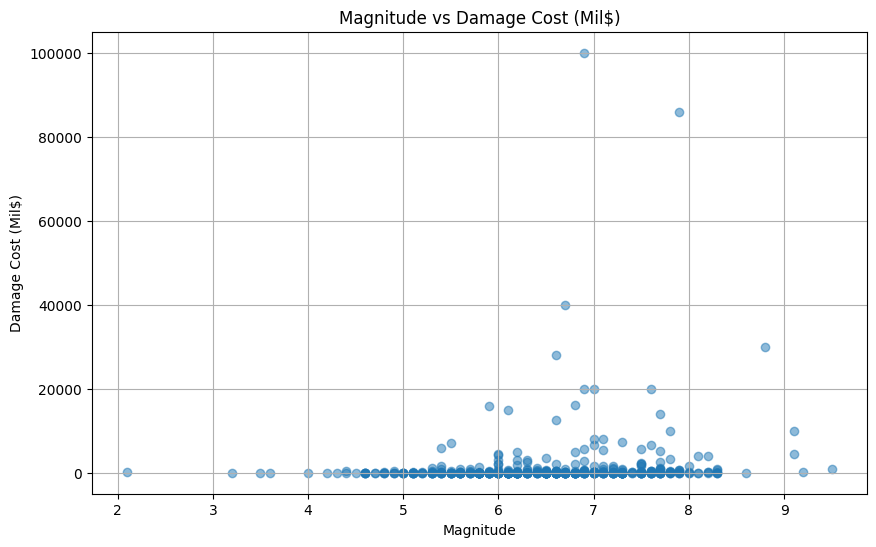

In [48]:
# Function to show the relationship between magnitude and damage cost (Mil$)
# Input: DataFrame containing earthquake data
# Output: Scatter plot of magnitude vs damage cost
def magnitude_vs_damage_cost(df):

    # Clean the data by dropping rows with NaN values in 'Mag' and 'Damage Cost (Mil$)' columns
    clean_df = df[['Mag', 'Damage ($Mil)']].dropna()

    plt.figure(figsize=(10, 6))
    plt.scatter(clean_df['Mag'], clean_df['Damage ($Mil)'], alpha=0.5)
    plt.title('Magnitude vs Damage Cost (Mil$)')
    plt.xlabel('Magnitude')
    plt.ylabel('Damage Cost (Mil$)')
    plt.grid(True)
    plt.show()

magnitude_vs_damage_cost(df)

As suprising as it looks, the damage cost is not especially correlated with the magnitude of the earthquake